In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.signal as signal
import matplotlib.dates as mdates
import seaborn as sns
from scipy import interpolate
from tqdm import tqdm

# Data

* 미국 국채 - Price: t{} / Return: t{}_log
* 회사채 - Price: D{}AA / Return: D{}AA_log
* Emerging - Price: emerging / Return: emerging_log
* US - Price: us / Return: us_log
* Commodity - Price: com / Return: com_log
* Gold - Price: gold / Return: gold_log

In [ ]:
# T-bill

t = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/US zero Price.csv')
t['Date'] = pd.to_datetime(t.Date)
t.set_index('Date', inplace = True)
t_log = np.log(t).diff(1)

In [ ]:
# 회사채

d = ['A', 'B']

for i in d:
  daa = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/D{}AA.csv'.format(i))
  daa['DATE'] = pd.to_datetime(daa.DATE)
  daa.set_index('DATE', inplace = True)
  daa['D{}AA Price'.format(i)] = daa['D{}AA Price'.format(i)].astype(float, errors='raise')
  daa_log = np.log(daa).diff(1)
  daa_log.rename(columns={'D{}AA Price'.format(i):'D{}AA Log'.format(i)}, inplace=True)
  globals()['D{}AA'.format(i)] = daa
  globals()['D{}AA_log'.format(i)] = daa_log

In [ ]:
# Emerging

emerging = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/iShares MSCI Emerging Markets ETF 2003-04-13.csv')
emerging = emerging[['Date', 'Adj Close']]
emerging['Date'] = pd.to_datetime(emerging.Date)
emerging.set_index('Date', inplace = True)
emerging.rename(columns={'Adj Close':'Emerging'}, inplace = True)

emerging_log = np.log(emerging).diff(1)
emerging_log.rename(columns={'Emerging':'Emerging Log'}, inplace=True)

In [ ]:
# US

us = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/Wilshire 5000 1970-12-31.csv')
us = us.replace('.', np.NaN)
us['DATE'] = pd.to_datetime(us.DATE)
us.set_index('DATE', inplace = True)
us.rename(columns={'WILL5000IND':'US'}, inplace = True)
us['US'] = us['US'].astype(float, errors='raise')

us_log = np.log(us).diff(1)
us_log.rename(columns={'US':'US Log'}, inplace=True)

In [ ]:
# Commodity

com = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/S&P GSCI Commodity Total Return Data 1979-12-27_PP.csv', thousands = ',')
com = com[['Date', 'Price']]
com['Date'] = pd.to_datetime(com.Date)
com.set_index('Date', inplace = True)
com.rename(columns={'Price':'Commodity'}, inplace = True)

com_log = np.log(com).diff(1)
com_log.rename(columns={'Commodity':'Commodity Log'}, inplace=True)

In [ ]:
# Gold

gold = pd.read_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/필라델피아 금은 Preprocessed.csv')
gold['Date'] = pd.to_datetime(gold.Date)
gold.set_index('Date', inplace = True)
gold.rename(columns={'필라델피아 금/은':'Gold'}, inplace = True)

gold_log = np.log(gold).diff(1)
gold_log.rename(columns={'Gold':'Gold Log'}, inplace=True)

In [ ]:
price_list = [DAAA, DBAA, t, gold, emerging, com, us] 
ret_list = [DAAA_log, DBAA_log, t_log, gold_log, emerging_log, com_log, us_log] 

In [ ]:
price = pd.concat(price_list, axis=1)
price

,DAAA Price,DBAA Price,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold,Emerging,Commodity,US
1961-06-14,NaN,NaN,97.103877,93.573163,90.055853,86.661263,83.393738,80.250107,77.224499,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-15,NaN,NaN,97.092940,93.506940,89.938291,86.497238,83.187367,80.004077,76.942719,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-16,NaN,NaN,97.086248,93.506036,89.934905,86.489565,83.175341,79.987891,76.923007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-19,NaN,NaN,97.092186,93.461927,89.867747,86.407540,83.080409,79.881623,76.805894,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-20,NaN,NaN,97.103123,93.513451,89.936988,86.489898,83.174540,79.986042,76.919895,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,NaN,NaN,98.813839,96.761637,94.772243,92.992421,91.347343,89.738418,88.095431,86.383566,...,55.305225,53.766792,52.269558,50.812862,49.397225,48.020209,159.08,43.090000,4152.1602,NaN
2022-03-09,NaN,NaN,98.783189,96.680213,94.619923,92.761925,91.042049,89.367041,87.669059,85.913426,...,54.610370,53.067236,51.567693,50.108306,48.690867,47.311517,157.54,44.310001,NaN,NaN
2022-03-10,NaN,NaN,98.762311,96.614083,94.492126,92.569543,90.792284,89.071859,87.339133,85.556165,...,53.480641,51.890655,50.346613,48.846557,47.389614,45.974727,NaN,43.480000,NaN,NaN
2022-03-11,NaN,NaN,98.733447,96.554284,94.392054,92.436006,90.639708,88.914231,87.187569,85.418017,...,53.763070,52.196795,50.673720,49.194453,47.758073,46.362124,NaN,42.570000,NaN,NaN


In [ ]:
ret = pd.concat(ret_list, axis=1)
ret

,DAAA Log,DBAA Log,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold Log,Emerging Log,Commodity Log,US Log
1961-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-15,NaN,NaN,-0.000113,-0.000708,-0.001306,-0.001895,-0.002478,-0.003070,-0.003656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-16,NaN,NaN,-0.000069,-0.000010,-0.000038,-0.000089,-0.000145,-0.000202,-0.000256,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-19,NaN,NaN,0.000061,-0.000472,-0.000747,-0.000949,-0.001142,-0.001329,-0.001524,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-20,NaN,NaN,0.000113,0.000551,0.000770,0.000953,0.001132,0.001306,0.001483,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08,NaN,NaN,-0.000489,-0.001671,-0.002824,-0.003769,-0.004549,-0.005241,-0.005908,-0.006585,...,-0.009694,-0.009446,-0.009174,-0.008884,-0.008577,-0.008286,0.009030,0.003254,0.027337,NaN
2022-03-09,NaN,NaN,-0.000310,-0.000842,-0.001609,-0.002482,-0.003348,-0.004147,-0.004852,-0.005457,...,-0.012644,-0.013096,-0.013519,-0.013963,-0.014403,-0.014868,-0.009728,0.027919,NaN,NaN
2022-03-10,NaN,NaN,-0.000211,-0.000684,-0.001352,-0.002076,-0.002747,-0.003308,-0.003770,-0.004167,...,-0.020904,-0.022421,-0.023964,-0.025503,-0.027088,-0.028662,NaN,-0.018909,NaN,NaN
2022-03-11,NaN,NaN,-0.000292,-0.000619,-0.001060,-0.001444,-0.001682,-0.001771,-0.001737,-0.001616,...,0.005267,0.005882,0.006476,0.007097,0.007745,0.008391,NaN,-0.021151,NaN,NaN


In [ ]:
ret = ret['1979-12-30':'2022-02-28']
ret1 = ret[['US Log', 'Emerging Log', 'SVENY20PRICE', 'SVENY07PRICE', 'SVENY01PRICE', 'Commodity Log', 'Gold Log']]
ret1

,US Log,Emerging Log,SVENY20PRICE,SVENY07PRICE,SVENY01PRICE,Commodity Log,Gold Log
1979-12-31,0.000000,NaN,NaN,0.005532,0.001773,-0.004766,NaN
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,-0.009782,-0.001292,0.008470,NaN
1980-01-03,NaN,NaN,NaN,-0.002613,-0.000768,0.003892,NaN
1980-01-04,NaN,NaN,NaN,-0.003807,0.000041,-0.002377,NaN
...,...,...,...,...,...,...,...
2022-02-24,0.017024,-0.020861,-0.000215,0.002534,0.000520,0.013193,-0.019810
2022-02-25,0.022349,0.018329,-0.001954,-0.001476,-0.000409,-0.022683,0.017573
2022-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


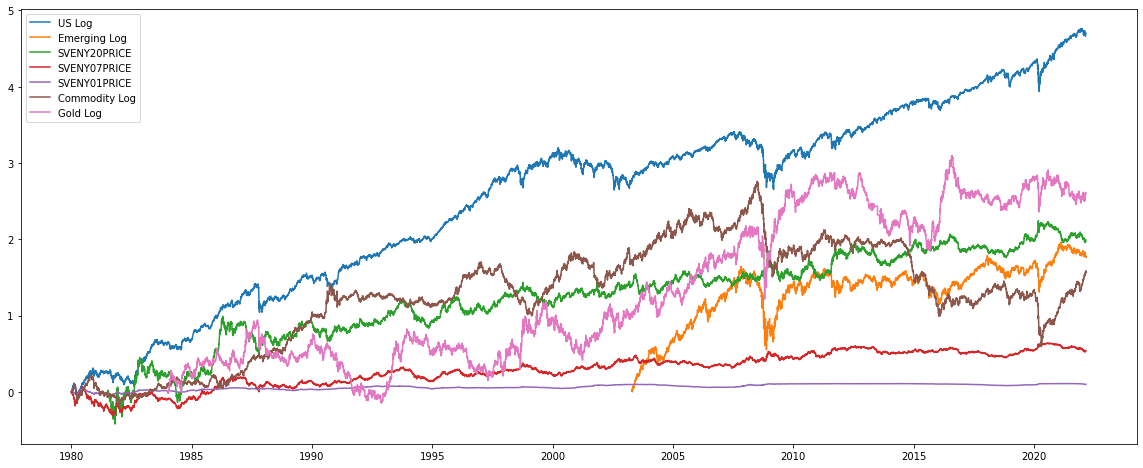

In [ ]:
# Cumulative sum for log returns
cumreto = ret1.cumsum()

plt.figure(figsize=(20,8))
sns.lineplot(data=cumreto, dashes=False)

100%|██████████| 14/14 [05:24<00:00, 23.15s/it]


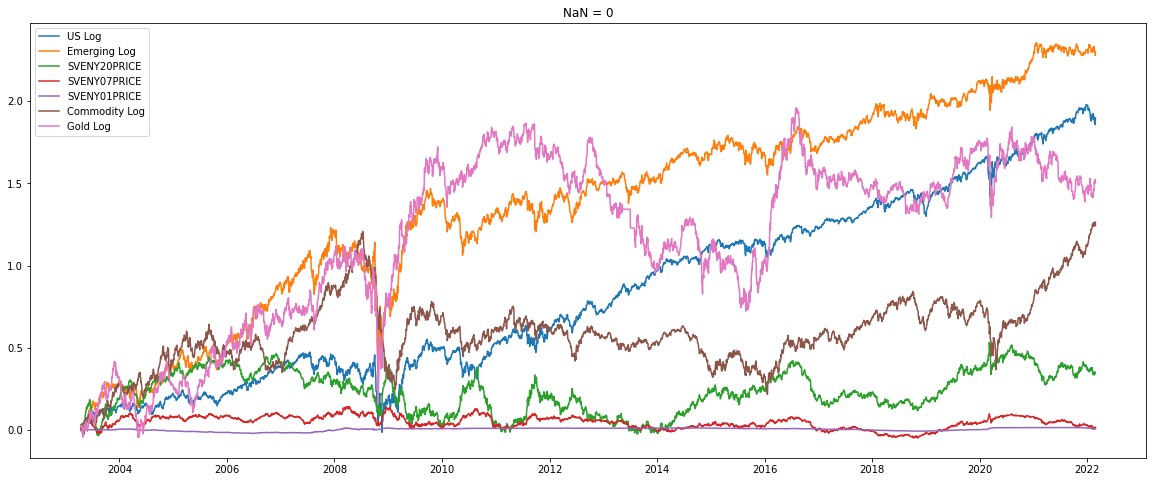

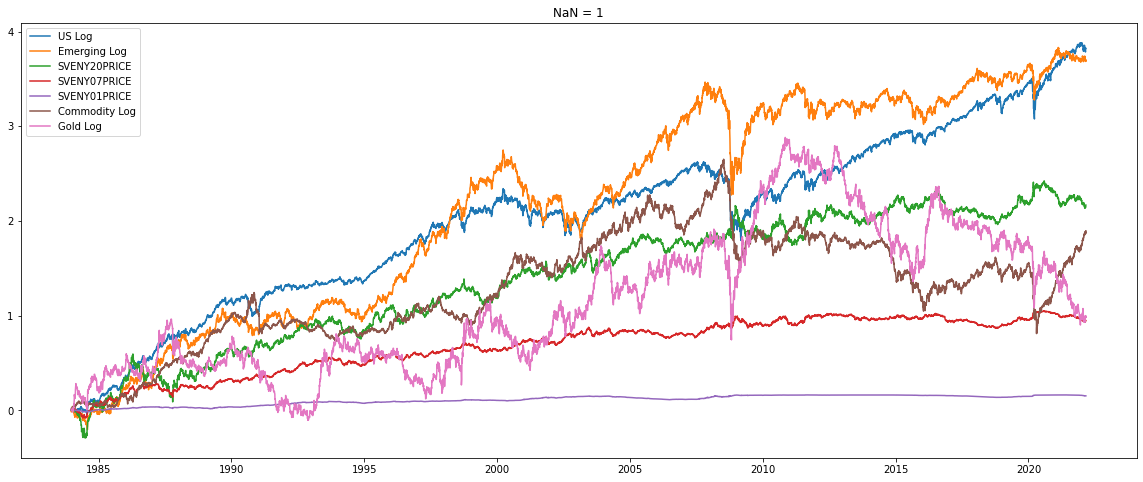

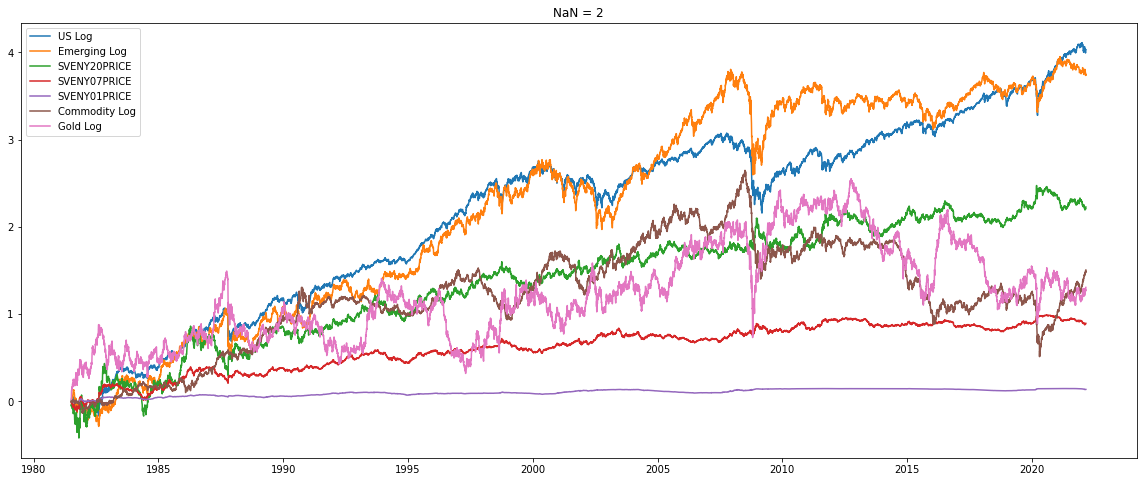

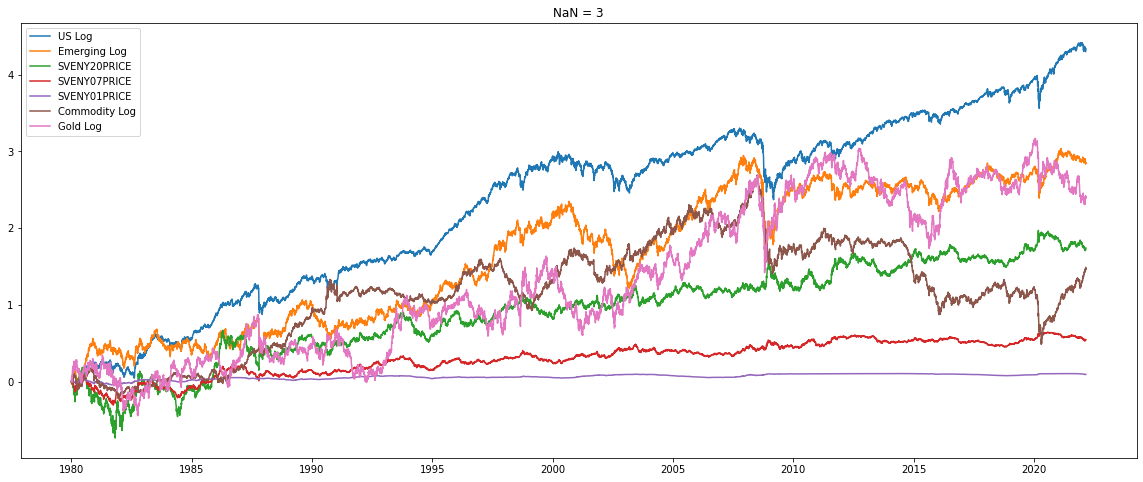

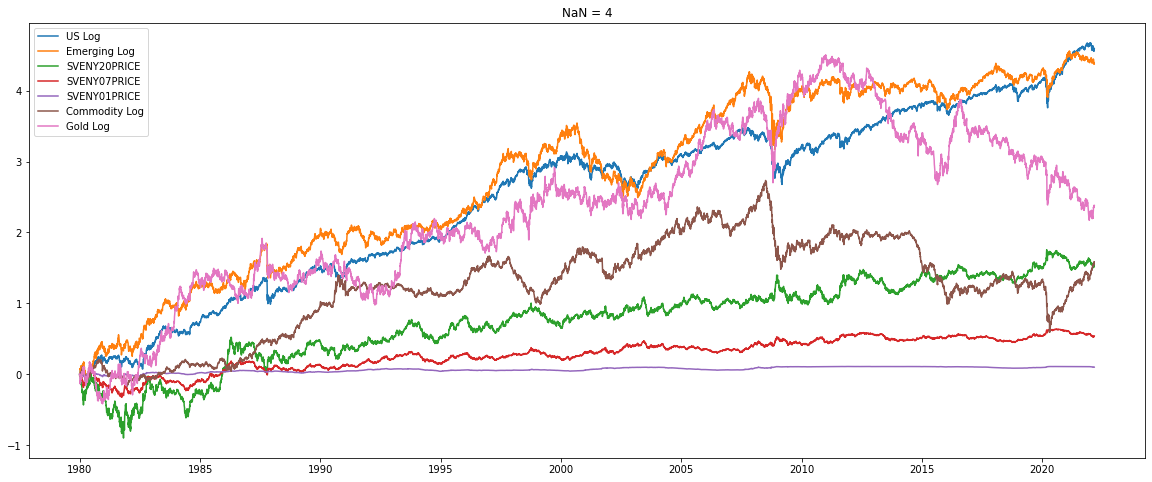

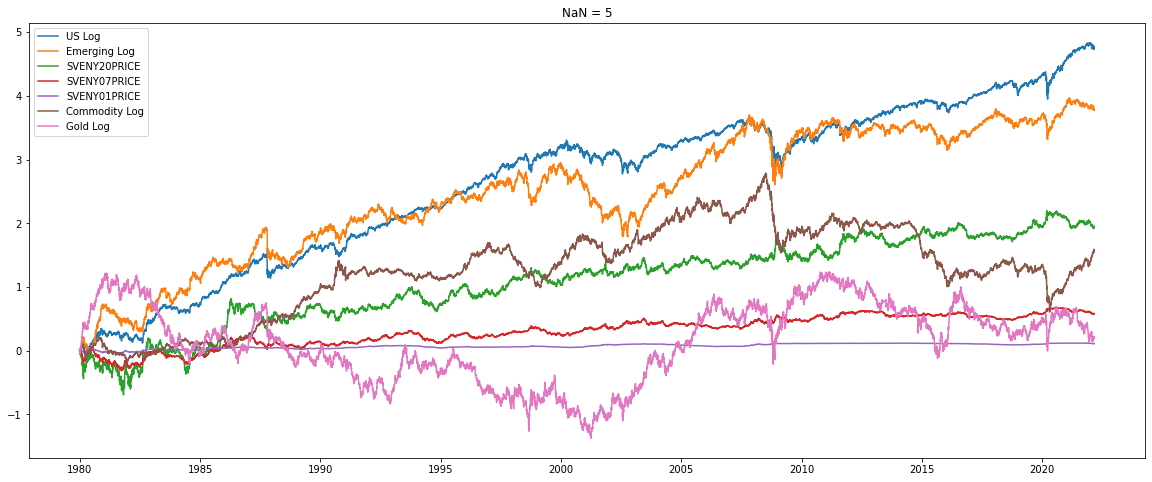

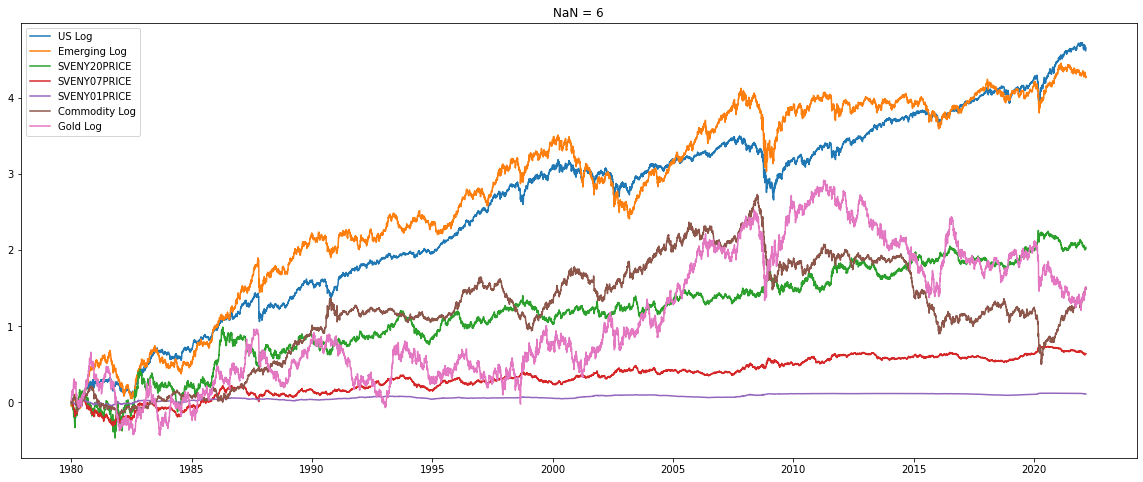

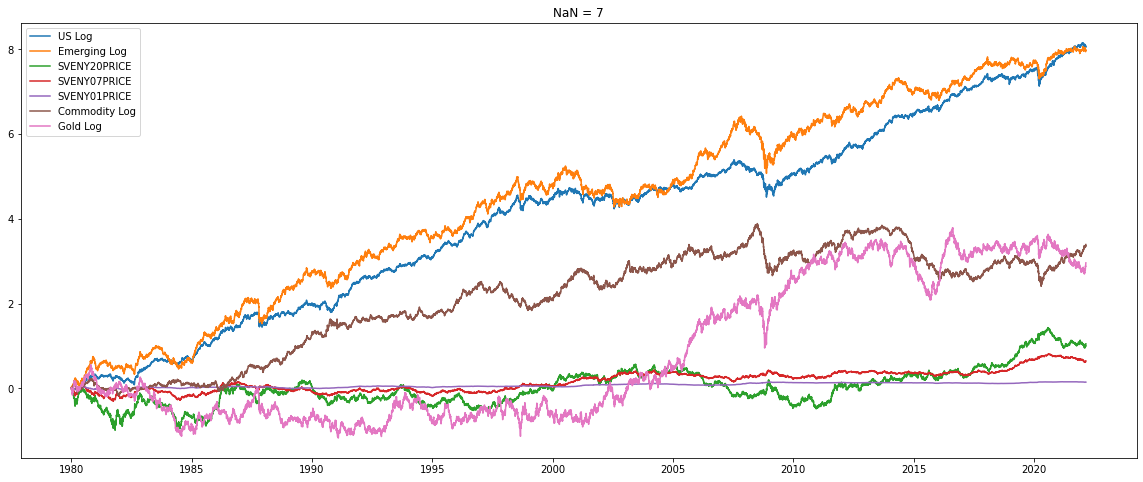

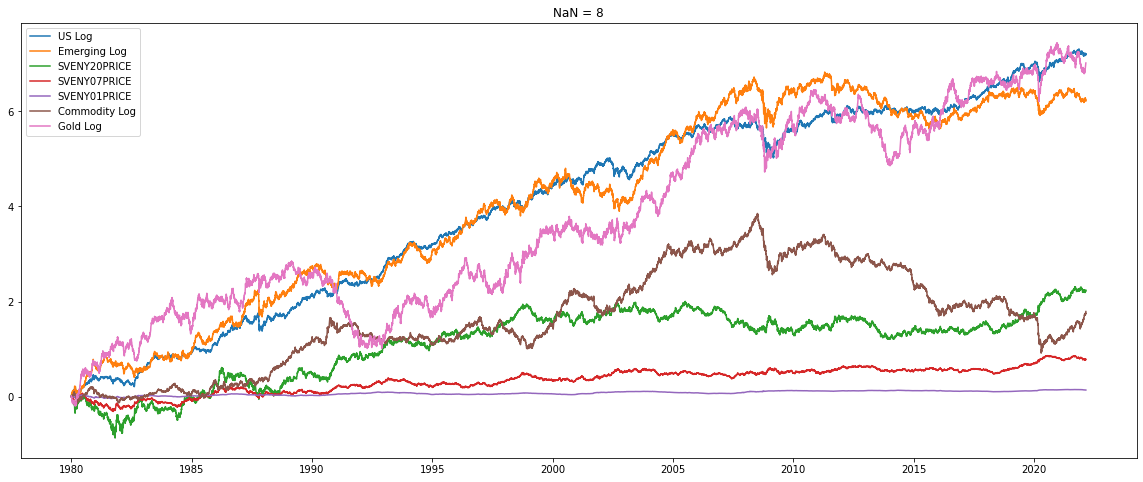

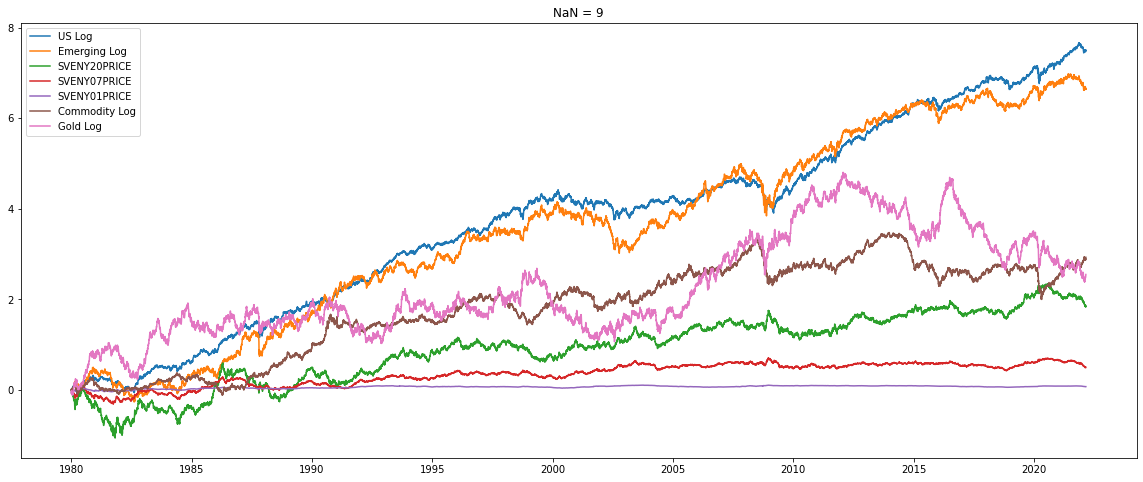

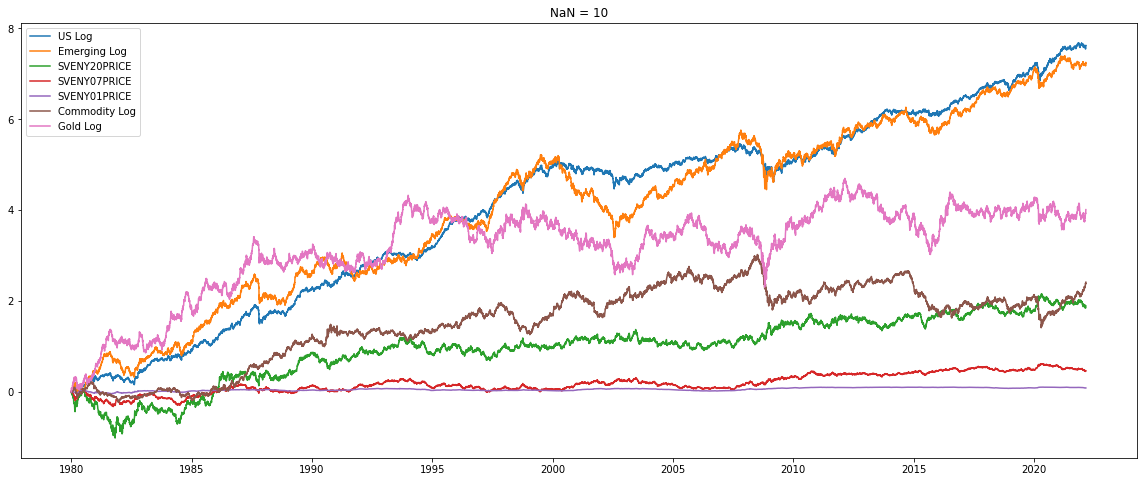

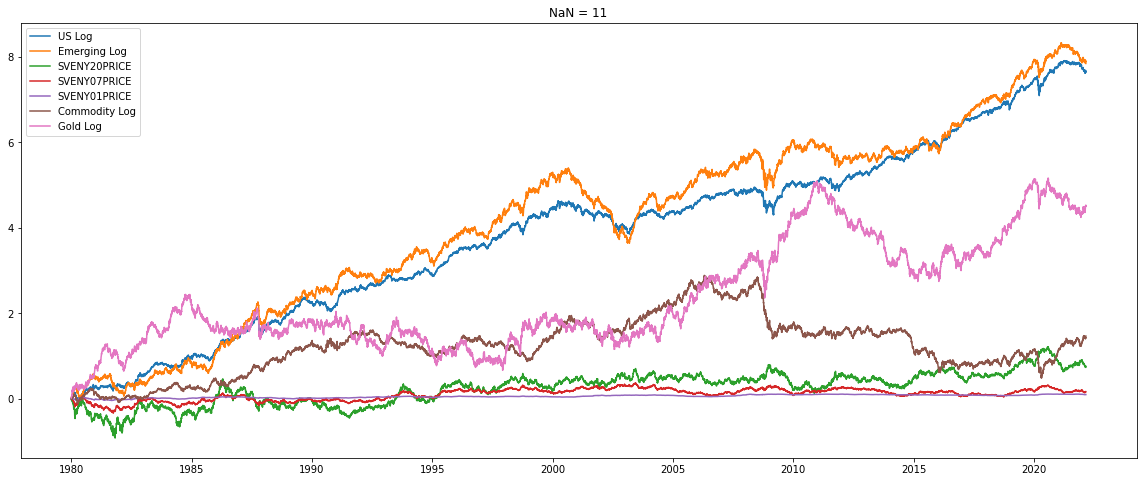

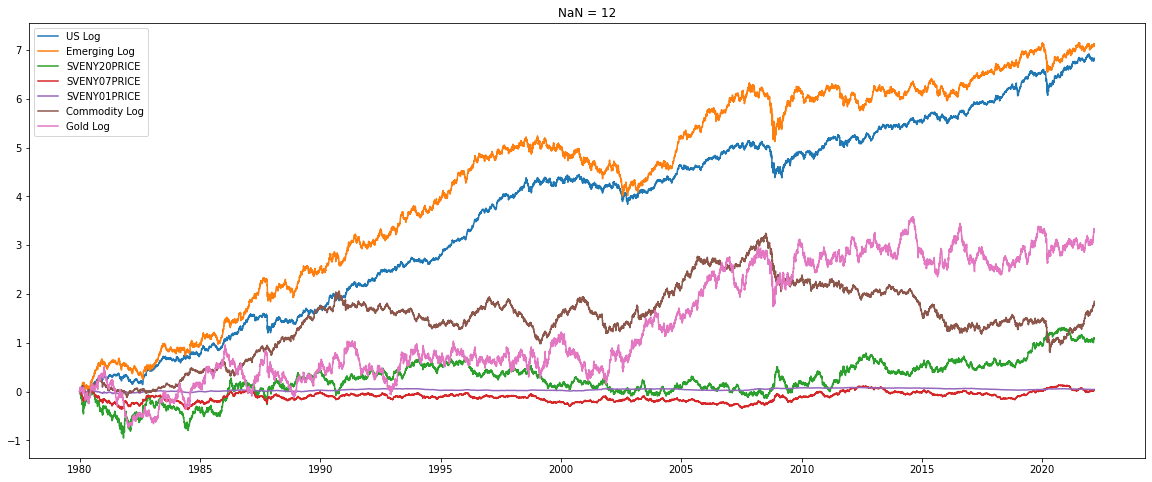

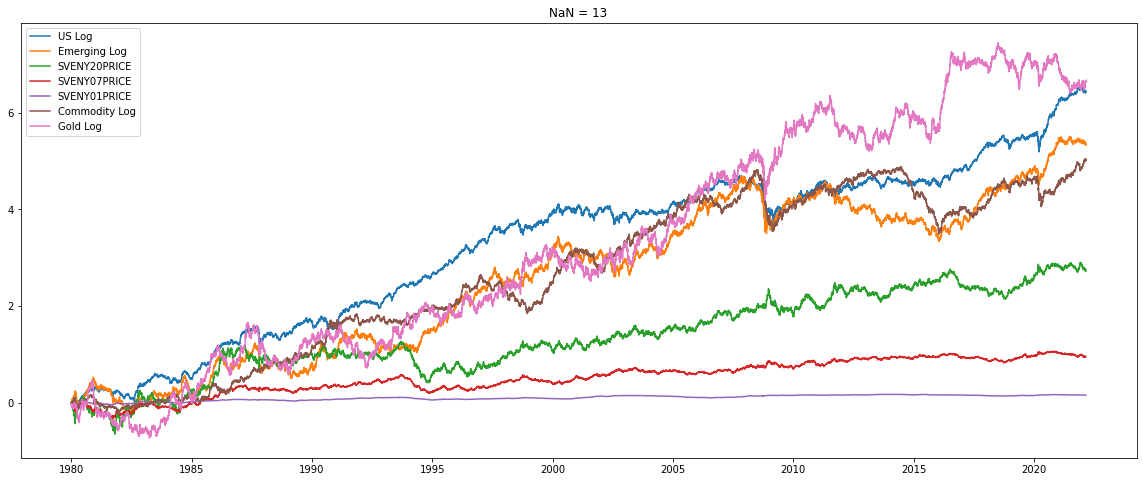

In [ ]:
for j in tqdm(range(14)): # Number of NAs: 0 to 13

  na = ret1.copy()

  # Drop the row when the number of NA is more than j
  for i in na.index:
    if na.loc[i].isnull().sum() <= j:
      continue
    else:
      na.drop(i, inplace = True)       

  # Imputation
  imp = IterativeImputer(imputation_order='arabic', sample_posterior=True)
  imp.fit(na)
  ar_imp = imp.transform(na)

  # Array > DataFrame
  df_imp = pd.DataFrame(ar_imp, columns = na.columns, index = na.index)

  # Cumulative sum of log returns after imputation
  cumret = df_imp.cumsum()

  plt.figure(figsize=(20,8))
  sns.lineplot(data=cumret, dashes=False).set_title('NaN = {}'.format(j))

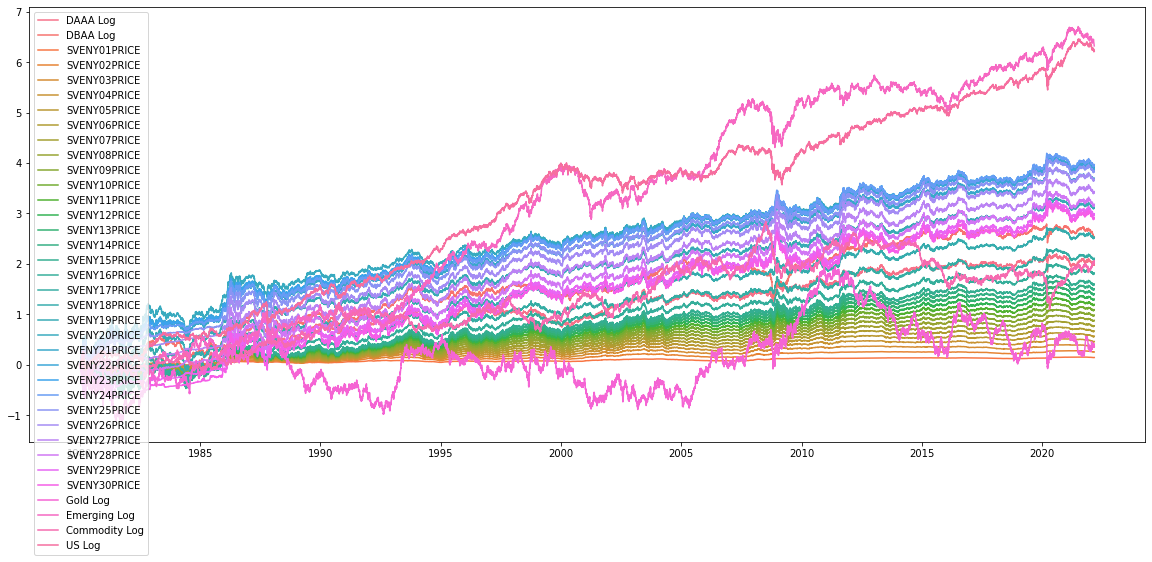

In [ ]:
imp = IterativeImputer(imputation_order='arabic', sample_posterior=True)
imp.fit(ret)
ar_imp = imp.transform(ret)

# Array > DataFrame
df_imp = pd.DataFrame(ar_imp, columns = ret.columns, index = ret.index)

# Cumulative sum of log returns after imputation
cumret = df_imp.cumsum()

plt.figure(figsize=(20,8))
sns.lineplot(data=cumret, dashes=False)

In [ ]:
df_imp

,DAAA Log,DBAA Log,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold Log,Emerging Log,Commodity Log,US Log
1979-12-31,0.005405,0.005054,0.001773,0.001468,0.001599,0.002430,0.003600,0.004714,0.005532,0.005930,...,0.004746,0.003444,0.001179,-0.001940,-0.005788,-0.010690,0.019442,-0.028850,-0.004766,0.000000
1980-01-01,-0.002391,-0.001004,0.000071,-0.000023,-0.000074,-0.000038,0.000015,0.000057,0.000058,0.000072,...,0.000025,0.000094,0.000178,0.000246,0.000426,0.000637,0.002731,-0.013328,-0.006579,-0.003674
1980-01-02,-0.013924,-0.011280,-0.001292,-0.001722,-0.002740,-0.004387,-0.006320,-0.008193,-0.009782,-0.010983,...,0.005805,0.002925,-0.001491,-0.004100,-0.006729,-0.007679,-0.004074,0.007247,0.008470,0.000900
1980-01-03,-0.009787,-0.001592,-0.000768,-0.001254,-0.001260,-0.001114,-0.001158,-0.001624,-0.002613,-0.004135,...,0.026380,0.017383,0.001713,-0.015361,-0.032657,-0.048617,-0.023045,-0.029211,0.003892,-0.018239
1980-01-04,0.004666,0.000521,0.000041,-0.000014,-0.000562,-0.001440,-0.002383,-0.003214,-0.003807,-0.004125,...,-0.001008,-0.000786,-0.000312,0.000556,0.001883,0.003819,0.003914,0.019478,-0.002377,0.018558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0.000000,-0.021124,0.000520,0.001055,0.001603,0.002070,0.002385,0.002537,0.002534,0.002408,...,-0.000830,-0.000939,-0.001054,-0.001148,-0.001274,-0.001376,-0.019810,-0.020861,0.013193,0.017024
2022-02-25,-0.001935,0.005759,-0.000409,-0.000616,-0.000896,-0.001178,-0.001379,-0.001478,-0.001476,-0.001420,...,-0.002929,-0.003122,-0.003320,-0.003525,-0.003735,-0.003952,0.017573,0.018329,-0.022683,0.022349
2022-02-26,0.003702,0.002656,-0.000307,-0.000006,0.000013,0.000029,0.000066,0.000083,0.000070,0.000061,...,0.000171,0.000206,0.000204,0.000240,0.000245,0.000250,-0.010081,-0.025770,0.008658,-0.013636
2022-02-27,-0.000298,0.000385,0.000018,0.000065,0.000037,0.000002,0.000019,0.000076,0.000074,0.000117,...,0.000248,0.000222,0.000160,0.000148,0.000177,0.000257,0.020702,-0.006357,-0.004210,-0.007998


In [ ]:
cumret

,DAAA Log,DBAA Log,SVENY01PRICE,SVENY02PRICE,SVENY03PRICE,SVENY04PRICE,SVENY05PRICE,SVENY06PRICE,SVENY07PRICE,SVENY08PRICE,...,SVENY25PRICE,SVENY26PRICE,SVENY27PRICE,SVENY28PRICE,SVENY29PRICE,SVENY30PRICE,Gold Log,Emerging Log,Commodity Log,US Log
1979-12-31,0.005405,0.005054,0.001773,0.001468,0.001599,0.002430,0.003600,0.004714,0.005532,0.005930,...,0.004746,0.003444,0.001179,-0.001940,-0.005788,-0.010690,0.019442,-0.028850,-0.004766,0.000000
1980-01-01,0.003014,0.004050,0.001844,0.001445,0.001524,0.002392,0.003615,0.004772,0.005591,0.006001,...,0.004771,0.003538,0.001357,-0.001694,-0.005362,-0.010053,0.022173,-0.042178,-0.011345,-0.003674
1980-01-02,-0.010911,-0.007230,0.000552,-0.000277,-0.001216,-0.001994,-0.002705,-0.003421,-0.004191,-0.004981,...,0.010576,0.006463,-0.000134,-0.005794,-0.012091,-0.017732,0.018099,-0.034931,-0.002875,-0.002775
1980-01-03,-0.020698,-0.008822,-0.000215,-0.001531,-0.002476,-0.003108,-0.003863,-0.005046,-0.006805,-0.009116,...,0.036956,0.023846,0.001579,-0.021155,-0.044747,-0.066349,-0.004946,-0.064142,0.001017,-0.021013
1980-01-04,-0.016031,-0.008301,-0.000174,-0.001545,-0.003038,-0.004549,-0.006246,-0.008260,-0.010612,-0.013241,...,0.035948,0.023060,0.001267,-0.020599,-0.042864,-0.062529,-0.001032,-0.044664,-0.001360,-0.002455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,1.976672,2.519618,0.143288,0.252056,0.353368,0.457104,0.560534,0.662239,0.764850,0.870998,...,3.823231,3.653001,3.406083,3.153108,2.966270,2.893324,0.348607,6.348352,2.050037,6.220611
2022-02-25,1.974737,2.525377,0.142879,0.251440,0.352472,0.455926,0.559155,0.660761,0.763373,0.869578,...,3.820303,3.649879,3.402762,3.149583,2.962534,2.889372,0.366180,6.366682,2.027354,6.242960
2022-02-26,1.978439,2.528033,0.142572,0.251433,0.352485,0.455955,0.559222,0.660844,0.763443,0.869638,...,3.820473,3.650085,3.402967,3.149823,2.962779,2.889623,0.356099,6.340912,2.036011,6.229324
2022-02-27,1.978141,2.528419,0.142590,0.251498,0.352522,0.455957,0.559241,0.660920,0.763517,0.869756,...,3.820722,3.650306,3.403127,3.149971,2.962956,2.889880,0.376801,6.334554,2.031802,6.221326


In [ ]:
df_imp.to_csv('/content/drive/MyDrive/FR/머신러닝 프로젝트/Imputation Return.csv')